In [ ]:
from google.colab import files
files.upload()

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir deepfake_detection

In [ ]:
%cd deepfake_detection

/content/deepfake_detection


In [ ]:
!kaggle datasets list -s deepfake-and-real-images

ref                                         title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
manjilkarki/deepfake-and-real-images        deepfake and real images                      2GB  2022-02-03 15:33:45           1193         16  0.625            
itamargr/dfdc-faces-of-the-train-sample     dfdc faces of the train sample                4GB  2020-03-01 18:05:23            688         24  0.75             
mtesconi/twitter-deep-fake-text             TweepFake - Twitter deep Fake text Dataset  345KB  2021-04-29 11:39:23           1797         21  0.85294116       
sciarrilli/dfdc-f150                        dfdc_frame_150                              892MB  2020-01-27 17:50:20            278         13  0.5625           
hhalalwi/deepfake-face-mask-dataset-dffm

In [ ]:
!kaggle datasets download manjilkarki/deepfake-and-real-images

100% 1.68G/1.68G [00:18<00:00, 98.1MB/s]
100% 1.68G/1.68G [00:18<00:00, 97.2MB/s]


In [ ]:
!unzip deepfake-and-real-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Validation/Real/real_5499.jpg  
  inflating: Dataset/Validation/Real/real_55.jpg  
  inflating: Dataset/Validation/Real/real_550.jpg  
  inflating: Dataset/Validation/Real/real_5500.jpg  
  inflating: Dataset/Validation/Real/real_5501.jpg  
  inflating: Dataset/Validation/Real/real_5502.jpg  
  inflating: Dataset/Validation/Real/real_5503.jpg  
  inflating: Dataset/Validation/Real/real_5504.jpg  
  inflating: Dataset/Validation/Real/real_5505.jpg  
  inflating: Dataset/Validation/Real/real_5506.jpg  
  inflating: Dataset/Validation/Real/real_5507.jpg  
  inflating: Dataset/Validation/Real/real_5508.jpg  
  inflating: Dataset/Validation/Real/real_5509.jpg  
  inflating: Dataset/Validation/Real/real_551.jpg  
  inflating: Dataset/Validation/Real/real_5510.jpg  
  inflating: Dataset/Validation/Real/real_5511.jpg  
  inflating: Dataset/Validation/Real/real_5512.jpg  
  inflating: Dataset/Validation/Real/real_5513.jpg  

In [ ]:
!rm deepfake-and-real-images.zip

In [ ]:
cd ..

/content


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_fake = '/content/deepfake_detection/Dataset/Train/Fake'
train_real = '/content/deepfake_detection/Dataset/Train/Real'

70,000 images in train dataset for real and fake each

In [ ]:
import os
print(len(os.listdir(train_fake)))
print(len(os.listdir(train_real)))

70001
70001


In [ ]:
train_real_path='/content/deepfake_detection/Dataset/Train/Real'
train_fake_path='/content/deepfake_detection/Dataset/Train/Fake'

valid_real_path='/content/deepfake_detection/Dataset/Validation/Real'
valid_fake_path='/content/deepfake_detection/Dataset/Validation/Fake'

test_real_path='/content/deepfake_detection/Dataset/Test/Real'
test_fake_path='/content/deepfake_detection/Dataset/Test/Fake'

In [ ]:
train_real_image = os.listdir(train_real_path)
train_fake_image = os.listdir(train_fake_path)

valid_real_image = os.listdir(valid_real_path)
valid_fake_image = os.listdir(valid_fake_path)

test_real_image = os.listdir(test_real_path)
test_fake_image = os.listdir(test_fake_path)


print("Number of Real Images in Training= ",len(train_real_image))
print("Number of Fake Images in Training= ",len(train_fake_image ))

print('\n')
print("Number of Real Images in Validation= ",len(valid_real_image))
print("Number of Fake Images in Validation= ",len(valid_fake_image))

print('\n')
print("Number of Real Images in Testing= ",len(test_real_image))
print("Number of Fake Images in Testing= ",len(test_fake_image))

Number of Real Images in Training=  70001
Number of Fake Images in Training=  70001


Number of Real Images in Validation=  19787
Number of Fake Images in Validation=  19641


Number of Real Images in Testing=  5413
Number of Fake Images in Testing=  5492


Creating a small subset of dataset

In [ ]:
import os
import shutil
import random

# Paths to original dataset folders
real_source_folder = '/content/deepfake_detection/Dataset/Train/Real'
fake_source_folder = '/content/deepfake_detection/Dataset/Train/Fake'

dest_root_folder = '/content/deepfake_detection/new_dataset'

# Create destination directories if they don't exist
os.makedirs(dest_root_folder, exist_ok=True)

# Create subfolders for train, validation, and test splits
train_dest_folder = os.path.join(dest_root_folder, 'train')
valid_dest_folder = os.path.join(dest_root_folder, 'validation')
test_dest_folder = os.path.join(dest_root_folder, 'test')

for folder in [train_dest_folder, valid_dest_folder, test_dest_folder]:
    os.makedirs(os.path.join(folder, 'real'), exist_ok=True)
    os.makedirs(os.path.join(folder, 'fake'), exist_ok=True)

# Shuffle the image filenames
real_images = os.listdir(real_source_folder)
fake_images = os.listdir(fake_source_folder)
random.shuffle(real_images)
random.shuffle(fake_images)

# Number of samples for each split
train_samples = 500
valid_samples = 300
test_samples = 150

# Copy real images to the destination folders
for i in range(train_samples):
    shutil.copy(os.path.join(real_source_folder, real_images[i]), os.path.join(train_dest_folder, 'real', real_images[i]))

for i in range(train_samples, train_samples + valid_samples):
    shutil.copy(os.path.join(real_source_folder, real_images[i]), os.path.join(valid_dest_folder, 'real', real_images[i]))

for i in range(train_samples + valid_samples, train_samples + valid_samples + test_samples):
    shutil.copy(os.path.join(real_source_folder, real_images[i]), os.path.join(test_dest_folder, 'real', real_images[i]))

# Copy fake images to the destination folders
for i in range(train_samples):
    shutil.copy(os.path.join(fake_source_folder, fake_images[i]), os.path.join(train_dest_folder, 'fake', fake_images[i]))

for i in range(train_samples, train_samples + valid_samples):
    shutil.copy(os.path.join(fake_source_folder, fake_images[i]), os.path.join(valid_dest_folder, 'fake', fake_images[i]))

for i in range(train_samples + valid_samples, train_samples + valid_samples + test_samples):
    shutil.copy(os.path.join(fake_source_folder, fake_images[i]), os.path.join(test_dest_folder, 'fake', fake_images[i]))

In [ ]:
train_real_newpath='/content/deepfake_detection/new_dataset/train/real'
train_fake_newpath='/content/deepfake_detection/new_dataset/train/fake'

valid_real_newpath='/content/deepfake_detection/new_dataset/validation/real'
valid_fake_newpath='/content/deepfake_detection/new_dataset/validation/fake'

test_real_newpath='/content/deepfake_detection/new_dataset/test/real'
test_fake_newpath='/content/deepfake_detection/new_dataset/test/fake'

train_real_image = os.listdir(train_real_newpath)
train_fake_image = os.listdir(train_fake_newpath)

valid_real_image = os.listdir(valid_real_newpath)
valid_fake_image = os.listdir(valid_fake_newpath)

test_real_image = os.listdir(test_real_newpath)
test_fake_image = os.listdir(test_fake_newpath)


print("Number of Real Images in Training= ",len(train_real_image))
print("Number of Fake Images in Training= ",len(train_fake_image ))

print('\n')
print("Number of Real Images in Validation= ",len(valid_real_image))
print("Number of Fake Images in Validation= ",len(valid_fake_image))

print('\n')
print("Number of Real Images in Testing= ",len(test_real_image))
print("Number of Fake Images in Testing= ",len(test_fake_image))

Number of Real Images in Training=  500
Number of Fake Images in Training=  500


Number of Real Images in Validation=  300
Number of Fake Images in Validation=  300


Number of Real Images in Testing=  150
Number of Fake Images in Testing=  150


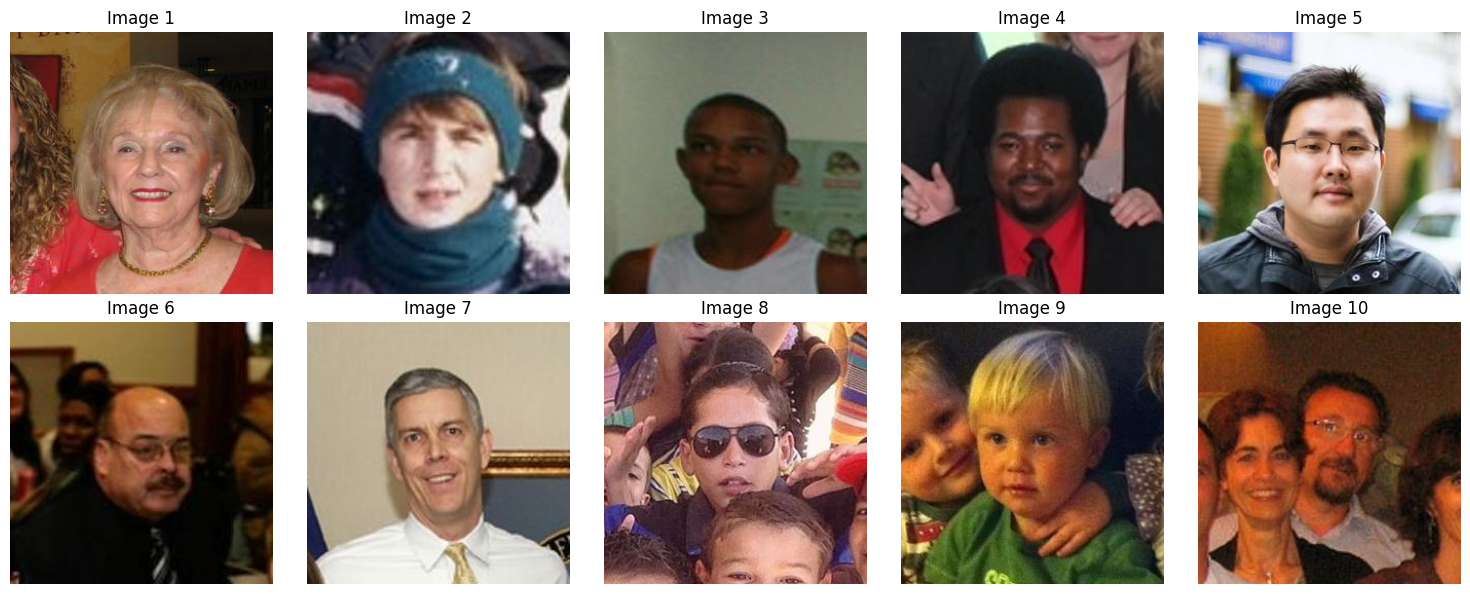

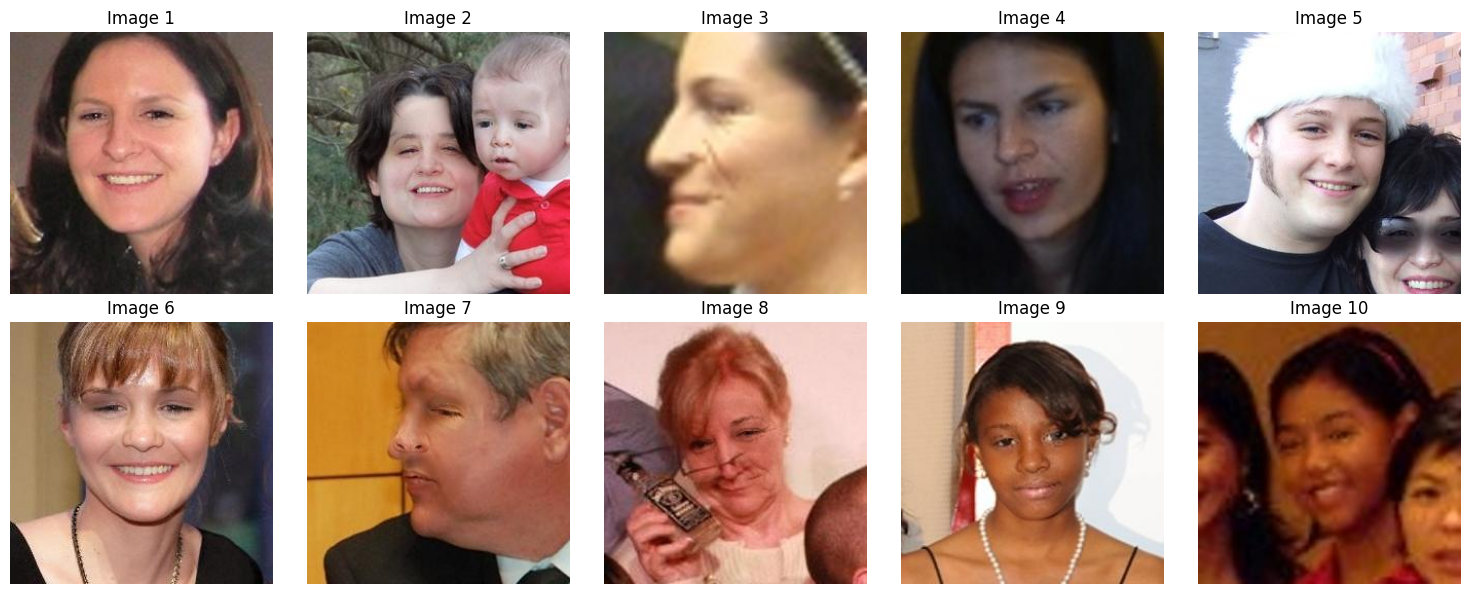

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

def display_images(image_paths):
    plt.figure(figsize=(15, 6))
    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Path to the dataset directory
dataset_directory_real = '/content/deepfake_detection/new_dataset/train/real'
dataset_directory_fake = '/content/deepfake_detection/new_dataset/train/fake'

# Get the paths of the first 10 images in the directory
image_files_real = [f for f in os.listdir(dataset_directory_real) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
first_10_images_real = [os.path.join(dataset_directory_real, filename) for filename in image_files_real[:10]]

image_files_fake = [f for f in os.listdir(dataset_directory_fake) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
first_10_images_fake = [os.path.join(dataset_directory_fake, filename) for filename in image_files_fake[:10]]

# Display the first 10 images
display_images(first_10_images_real)
display_images(first_10_images_fake)

# Pre Processing

Histogram Equalisation

It is used to enhance contrast, by effectively spreading out the most frequent intensity values.

2 imp concepts used in it are: PMF and CDF.

PMF - probability mass function of all pixels is calculated

CDF - cumulative distribution function

In [ ]:
import cv2
import os

def apply_histogram_equalization(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

def equalize_and_save_images(input_directory, output_directory):
    os.makedirs(output_directory, exist_ok=True)
    for filename in os.listdir(input_directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            input_image_path = os.path.join(input_directory, filename)
            equalized_image = apply_histogram_equalization(input_image_path)
            output_image_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_image_path, equalized_image)

# Path to training directories for real and fake images
real_train_directory = '/content/deepfake_detection/new_dataset/train/real'
fake_train_directory = '/content/deepfake_detection/new_dataset/train/fake'

# Paths to the new output directories
equalized_real_output_directory = '/content/deepfake_detection/hist2_dataset/real'
equalized_fake_output_directory = '/content/deepfake_detection/hist2_dataset/fake'

# Apply histogram equalization and save images in the new folders
equalize_and_save_images(real_train_directory, equalized_real_output_directory)
equalize_and_save_images(fake_train_directory, equalized_fake_output_directory)

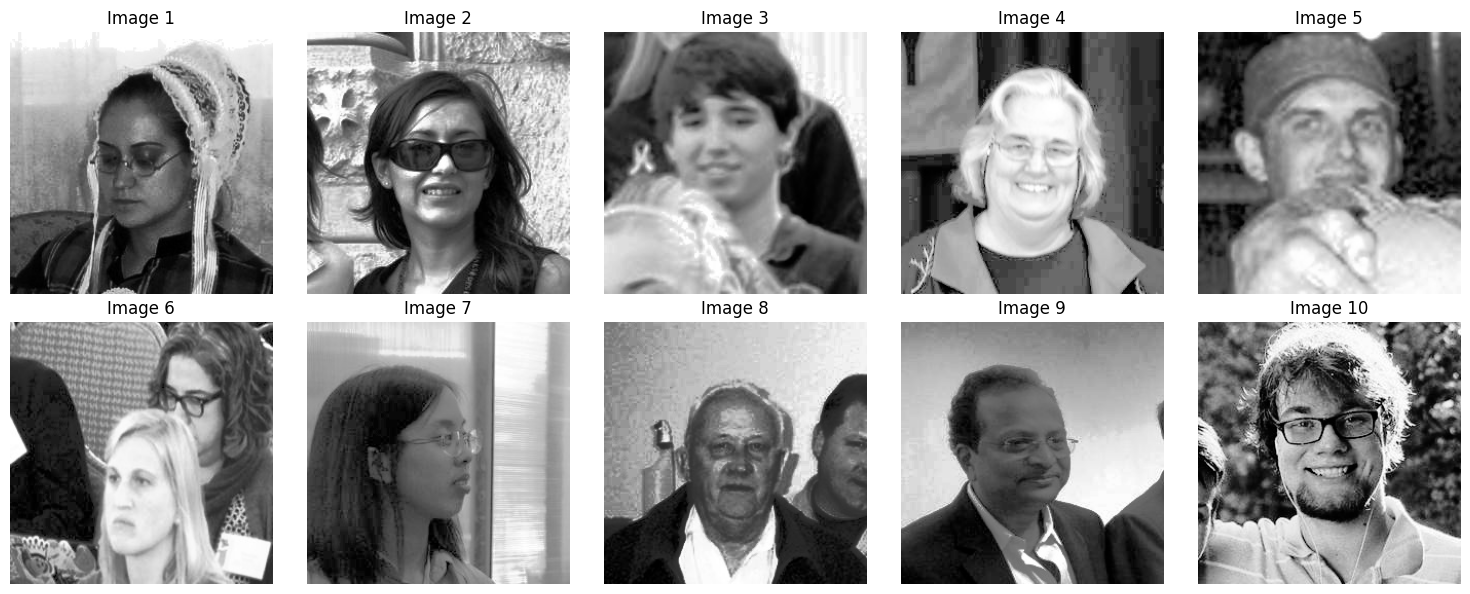

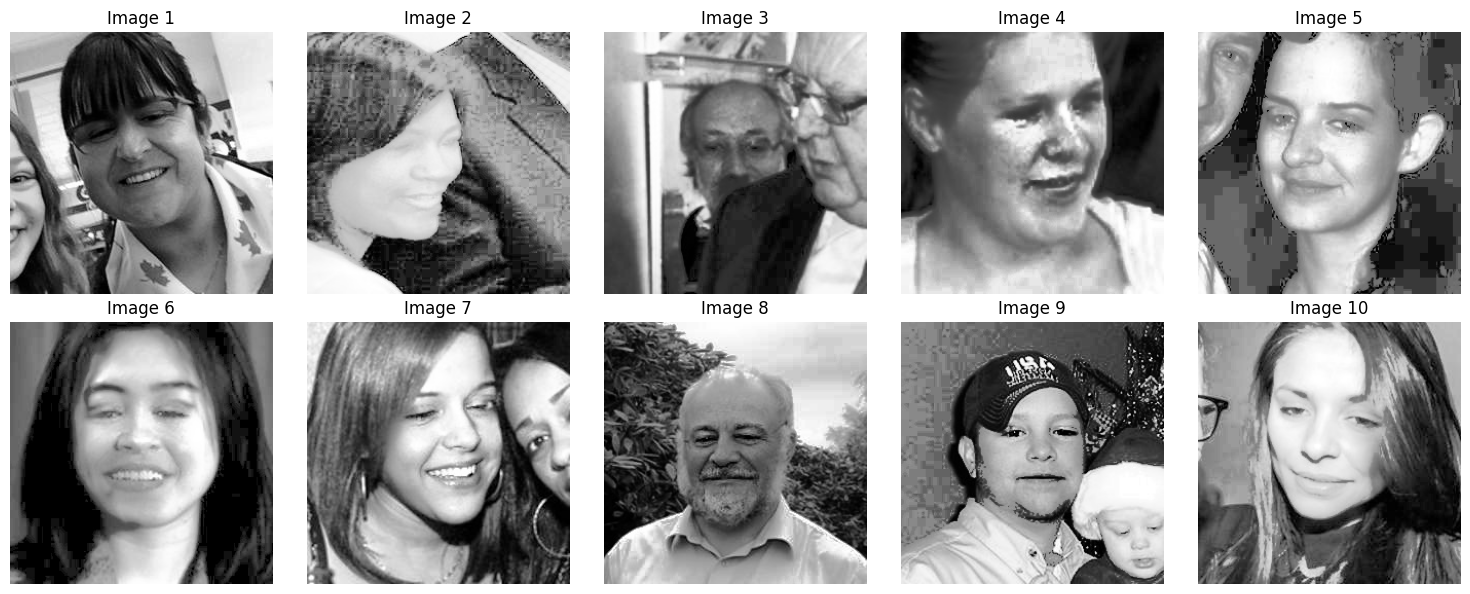

In [ ]:
import matplotlib.pyplot as plt

def display_images(image_paths):
    plt.figure(figsize=(15, 6))
    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Path to the dataset directory
dataset_directory_real = '/content/deepfake_detection/hist2_dataset/real'
dataset_directory_fake = '/content/deepfake_detection/hist2_dataset/fake'

# Get the paths of the first 10 images in the directory
image_files_real = [f for f in os.listdir(dataset_directory_real) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
first_10_images_real = [os.path.join(dataset_directory_real, filename) for filename in image_files_real[:10]]

image_files_fake = [f for f in os.listdir(dataset_directory_fake) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
first_10_images_fake = [os.path.join(dataset_directory_fake, filename) for filename in image_files_fake[:10]]

# Display the first 10 images
display_images(first_10_images_real)
display_images(first_10_images_fake)

Edge Detection

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def apply_edge_detection(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, threshold1=100, threshold2=200)  # Adjust thresholds as needed
    return edges

def edge_detect_images_in_directory(directory_path, output_directory):
    os.makedirs(output_directory, exist_ok=True)
    for filename in os.listdir(directory_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            input_image_path = os.path.join(directory_path, filename)
            edges = apply_edge_detection(input_image_path)
            output_image_path = os.path.join(output_directory, filename)
            cv2.imwrite(output_image_path, edges)

# Paths to your real and fake training directories
real_train_directory = '/content/deepfake_detection/new_dataset/train/real'
fake_train_directory = '/content/deepfake_detection/new_dataset/train/fake'

# Paths to the new output directories for edge-detected images
edge_detected_real_output_directory = '/content/deepfake_detection/edge_detected_dataset/real'
edge_detected_fake_output_directory = '/content/deepfake_detection/edge_detected_dataset/fake'

# Apply edge detection and save images in the new directories
edge_detect_images_in_directory(real_train_directory, edge_detected_real_output_directory)
edge_detect_images_in_directory(fake_train_directory, edge_detected_fake_output_directory)


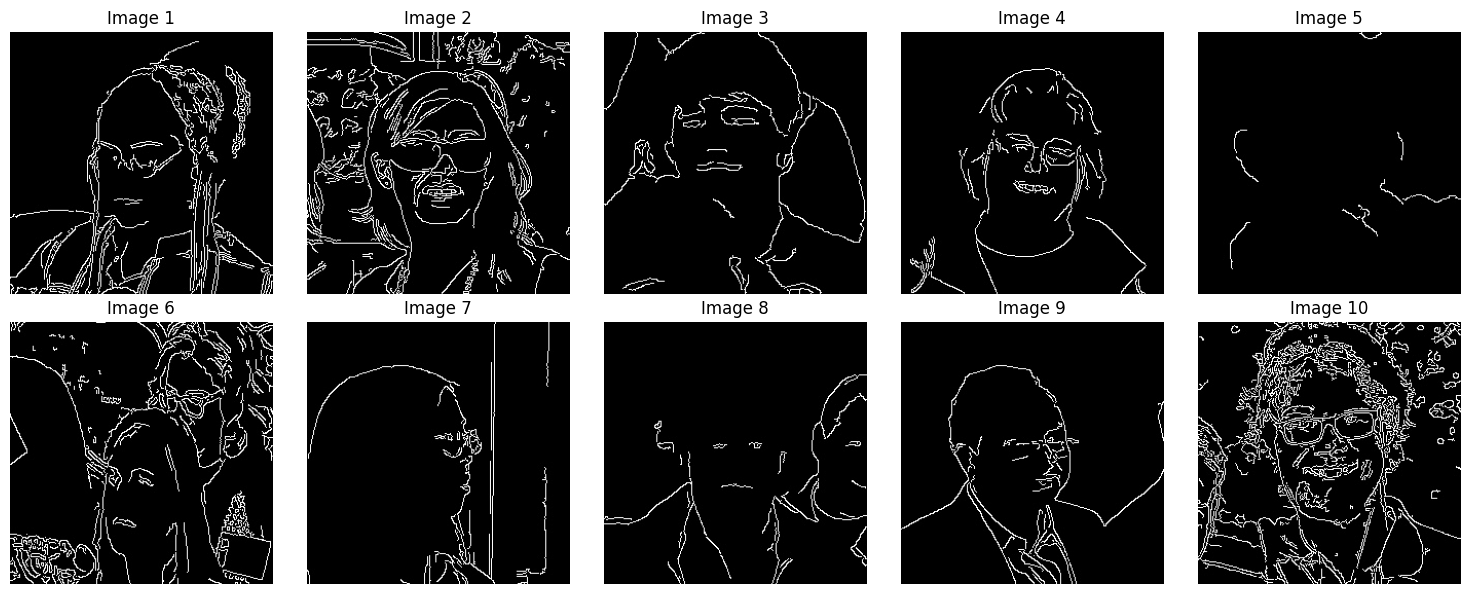

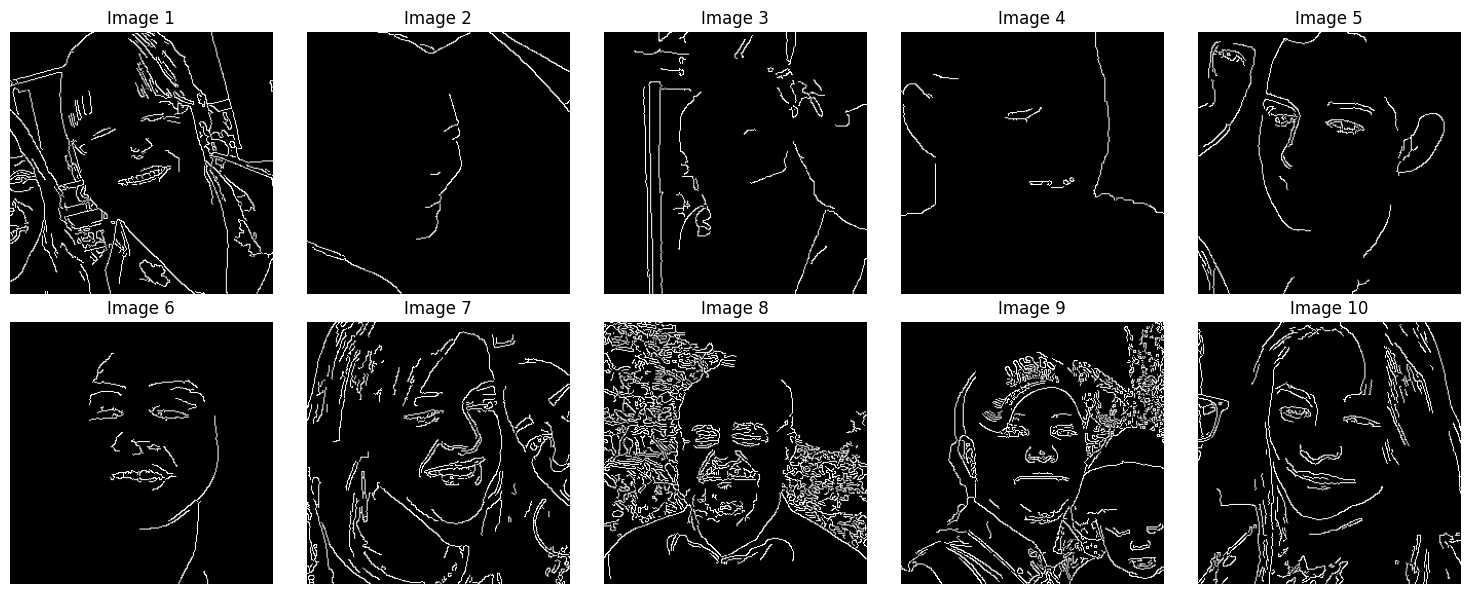

In [ ]:
import matplotlib.pyplot as plt

def display_images(image_paths):
    plt.figure(figsize=(15, 6))
    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Path to the dataset directory
dataset_directory_real = '/content/deepfake_detection/edge_detected_dataset/real'
dataset_directory_fake = '/content/deepfake_detection/edge_detected_dataset/fake'

# Get the paths of the first 10 images in the directory
image_files_real = [f for f in os.listdir(dataset_directory_real) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
first_10_images_real = [os.path.join(dataset_directory_real, filename) for filename in image_files_real[:10]]

image_files_fake = [f for f in os.listdir(dataset_directory_fake) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
first_10_images_fake = [os.path.join(dataset_directory_fake, filename) for filename in image_files_fake[:10]]

# Display the first 10 images
display_images(first_10_images_real)
display_images(first_10_images_fake)

# Data Augmentation

Techniques used for augmenting data:
1. rotating the image
2. zooming
3. flipping
4. changing the contrast
5. changing the brightness

In [ ]:
pip install Augmentor

In [ ]:
import Augmentor

input_real = "/content/deepfake_detection/Dataset/Train/Real"
output_real = "/content/deepfake_detection/augmented_dataset2/real"

# Create an Augmentor pipeline
p1 = Augmentor.Pipeline(input_real, output_real)


# Define augmentation operations
p1.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
p1.zoom_random(probability=0.5, percentage_area=0.8)
p1.flip_left_right(probability=0.5)
p1.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)
p1.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)

# Set the number of samples you want to generate
num_samples = 500

# Execute the augmentation pipeline
p1.sample(num_samples)


Initialised with 70001 image(s) found.
Output directory set to /content/deepfake_detection/augmented_dataset2/real.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7D6D4C1C76A0>: 100%|██████████| 500/500 [00:07<00:00, 70.59 Samples/s]


In [ ]:
input_fake = "/content/deepfake_detection/Dataset/Train/Fake"
output_fake = "/content/deepfake_detection/augmented_dataset2/fake"

p2 = Augmentor.Pipeline(input_fake, output_fake)

p2.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
p2.zoom_random(probability=0.5, percentage_area=0.8)
p2.flip_left_right(probability=0.5)
p2.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)
p2.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)

num_samples = 500

p2.sample(num_samples)

Initialised with 70001 image(s) found.
Output directory set to /content/deepfake_detection/augmented_dataset2/fake.

Processing <PIL.Image.Image image mode=RGB size=256x256 at 0x7D6D4AC5AC50>: 100%|██████████| 500/500 [00:08<00:00, 61.67 Samples/s]


In [ ]:
import os

# Specify the directory containing your data
data_directory_real = "/content/deepfake_detection/augmented_dataset2/real"
data_directory_fake = "/content/deepfake_detection/augmented_dataset2/fake"

# Count the number of files in the directory
num_files1 = len(os.listdir(data_directory_real))
num_files2 = len(os.listdir(data_directory_fake))

print("Number of files in the real dataset:", num_files1)
print("Number of files in the fake dataset:", num_files2)

Number of files in the real dataset: 500
Number of files in the fake dataset: 500


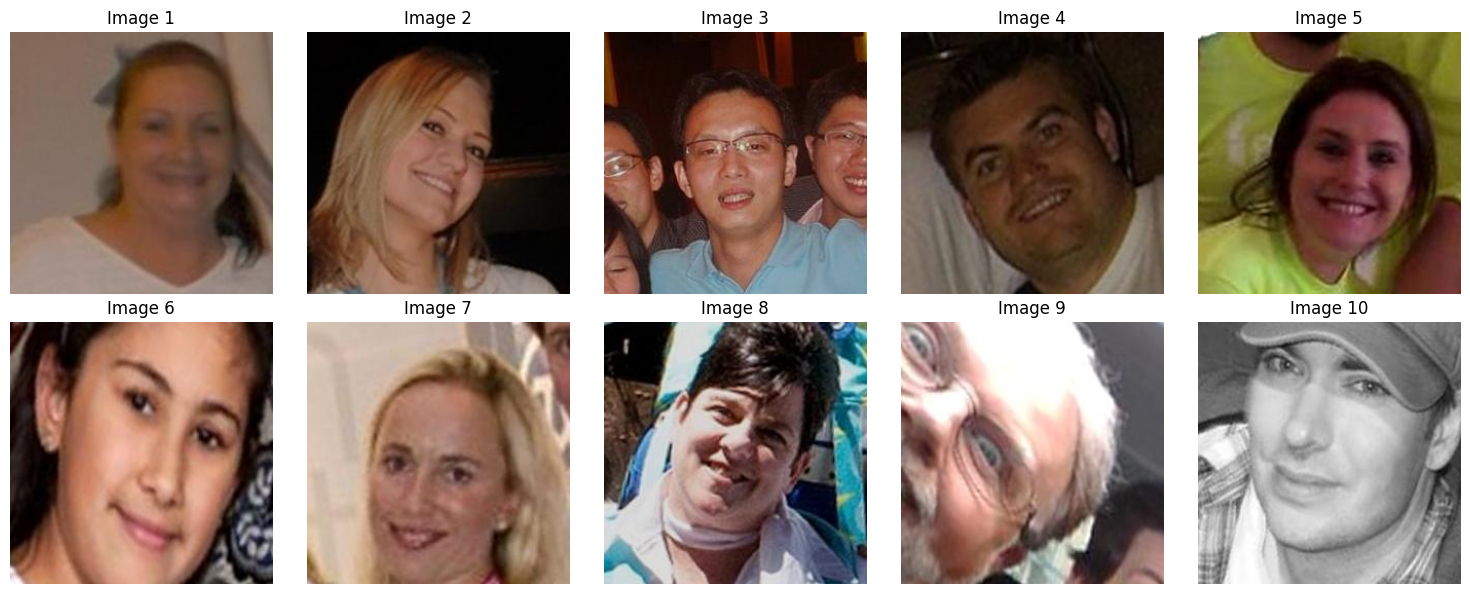

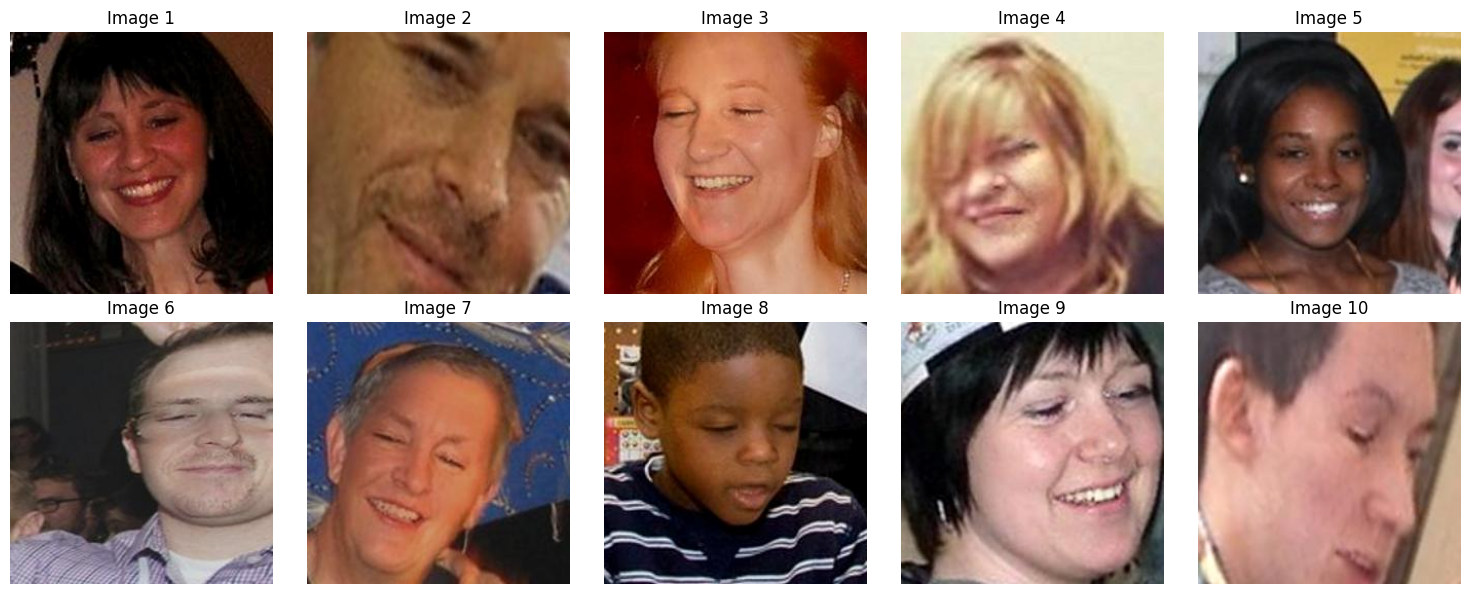

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

def display_images(image_paths):
    plt.figure(figsize=(15, 6))
    for i, image_path in enumerate(image_paths):
        img = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img_rgb)
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Path to the dataset directory
dataset_directory_real = '/content/deepfake_detection/augmented_dataset2/real'
dataset_directory_fake = '/content/deepfake_detection/augmented_dataset2/fake'

# Get the paths of the first 10 images in the directory
image_files_real = [f for f in os.listdir(dataset_directory_real) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
first_10_images_real = [os.path.join(dataset_directory_real, filename) for filename in image_files_real[:10]]

image_files_fake = [f for f in os.listdir(dataset_directory_fake) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
first_10_images_fake = [os.path.join(dataset_directory_fake, filename) for filename in image_files_fake[:10]]

# Display the first 10 images
display_images(first_10_images_real)
display_images(first_10_images_fake)

------

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, # rescaling the image size
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

batch_size = 32
epochs = 3
input_shape = (224, 224, 3)

train_generator = train_datagen.flow_from_directory(
    '/content/deepfake_detection/augmented_dataset2',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
   '/content/deepfake_detection/augmented_dataset2',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = train_datagen.flow_from_directory(
    '/content/deepfake_detection/new_dataset/test',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

Found 300 images belonging to 2 classes.


# ANN

on complete dataset, without applying pre-processing

In [ ]:
import tensorflow as tf

# Define ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/3
3501/3501 [==============================] - 2910s 831ms/step - loss: 0.8221 - accuracy: 0.5021 - val_loss: 0.6933 - val_accuracy: 0.5018
Epoch 2/3
3501/3501 [==============================] - 2843s 812ms/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6936 - val_accuracy: 0.5017
Epoch 3/3
3501/3501 [==============================] - 2771s 791ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6936 - val_accuracy: 0.4980


In [ ]:
# evaluate the model
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5)

341/341 [==============================] - 169s 493ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(test_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      5492
           1       0.00      0.00      0.00      5413

    accuracy                           0.50     10905
   macro avg       0.25      0.50      0.33     10905
weighted avg       0.25      0.50      0.34     10905



In [ ]:
print("Accuracy: ", accuracy_score(test_generator.classes, y_pred))

Accuracy:  0.5035304906006419


on augmented data

In [ ]:
import tensorflow as tf

# Define ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
22/22 [==============================] - 30s 1s/step - loss: 19.2092 - accuracy: 0.5029 - val_loss: 2.8806 - val_accuracy: 0.4967
Epoch 2/50
22/22 [==============================] - 12s 536ms/step - loss: 1.7046 - accuracy: 0.5057 - val_loss: 0.6975 - val_accuracy: 0.5033
Epoch 3/50
22/22 [==============================] - 12s 533ms/step - loss: 0.7074 - accuracy: 0.4986 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 4/50
22/22 [==============================] - 12s 539ms/step - loss: 0.8004 - accuracy: 0.5100 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/50
22/22 [==============================] - 11s 508ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.5033
Epoch 6/50
22/22 [==============================] - 10s 469ms/step - loss: 0.6924 - accuracy: 0.5014 - val_loss: 0.6908 - val_accuracy: 0.5033
Epoch 7/50
22/22 [==============================] - 12s 549ms/step - loss: 0.6957 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5033
E

In [ ]:
test_loss1, test_accuracy1 = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy1}")

10/10 [==============================] - 3s 291ms/step - loss: 0.6931 - accuracy: 0.5000
Test accuracy: 0.5


# CNN

on subset of dataset, after applying pre-processing

In [ ]:
import tensorflow as tf

# Define CNN model
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history2 = model2.fit(train_generator, epochs=10, validation_data=validation_generator)

In [ ]:
y_pred2 = model.predict(test_generator)
y_pred2 = (y_pred2 > 0.5)

341/341 [==============================] - 141s 413ms/step


In [ ]:
print(classification_report(test_generator.classes, y_pred2))

              precision    recall  f1-score   support

           0       0.51      0.66      0.57      5492
           1       0.50      0.35      0.41      5413

    accuracy                           0.50     10905
   macro avg       0.50      0.50      0.49     10905
weighted avg       0.50      0.50      0.49     10905



on augmented dataset

In [ ]:
import tensorflow as tf

# Define CNN model
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history2 = model2.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
22/22 [==============================] - 20s 584ms/step - loss: 0.7830 - accuracy: 0.5114 - val_loss: 0.6848 - val_accuracy: 0.5733
Epoch 2/10
22/22 [==============================] - 11s 517ms/step - loss: 0.6941 - accuracy: 0.5243 - val_loss: 0.6846 - val_accuracy: 0.5767
Epoch 3/10
22/22 [==============================] - 12s 553ms/step - loss: 0.6923 - accuracy: 0.5500 - val_loss: 0.6848 - val_accuracy: 0.5833
Epoch 4/10
22/22 [==============================] - 17s 777ms/step - loss: 0.6843 - accuracy: 0.5800 - val_loss: 0.6644 - val_accuracy: 0.6100
Epoch 5/10
22/22 [==============================] - 12s 558ms/step - loss: 0.6757 - accuracy: 0.5871 - val_loss: 0.6772 - val_accuracy: 0.5433
Epoch 6/10
22/22 [==============================] - 12s 555ms/step - loss: 0.6867 - accuracy: 0.5471 - val_loss: 0.6935 - val_accuracy: 0.5300
Epoch 7/10
22/22 [==============================] - 12s 552ms/step - loss: 0.6804 - accuracy: 0.5914 - val_loss: 0.6672 - val_accuracy: 0.6267

In [ ]:
test_loss2, test_accuracy2 = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy2}")

10/10 [==============================] - 4s 405ms/step - loss: 0.6931 - accuracy: 0.5000
Test accuracy: 0.5


# VGG16

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, # rescaling the image size
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

batch_size = 32
epochs = 3
input_shape = (224, 224, 3)

train_generator = train_datagen.flow_from_directory(
    '/content/deepfake_detection/new_dataset/train',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
   '/content/deepfake_detection/new_dataset/train',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report

In [ ]:
# Load VGG16 pre-trained model
base_model = VGG16(input_shape=input_shape, include_top=False, weights='imagenet')

# Add custom classification layers
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Create final model
model4 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze layers in the pre-trained base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

with 500 images

In [ ]:
# Train model
history4 = model4.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
22/22 [==============================] - 14s 642ms/step - loss: 0.5017 - accuracy: 0.8257 - val_loss: 0.5893 - val_accuracy: 0.7100
Epoch 2/30
22/22 [==============================] - 13s 595ms/step - loss: 0.4928 - accuracy: 0.8271 - val_loss: 0.5713 - val_accuracy: 0.7633
Epoch 3/30
22/22 [==============================] - 13s 593ms/step - loss: 0.4729 - accuracy: 0.8471 - val_loss: 0.5614 - val_accuracy: 0.8100
Epoch 4/30
22/22 [==============================] - 13s 595ms/step - loss: 0.4587 - accuracy: 0.8629 - val_loss: 0.5628 - val_accuracy: 0.7800
Epoch 5/30
22/22 [==============================] - 13s 595ms/step - loss: 0.4488 - accuracy: 0.8686 - val_loss: 0.5585 - val_accuracy: 0.7633
Epoch 6/30
22/22 [==============================] - 13s 597ms/step - loss: 0.4376 - accuracy: 0.8757 - val_loss: 0.6060 - val_accuracy: 0.7100
Epoch 7/30
22/22 [==============================] - 14s 667ms/step - loss: 0.4326 - accuracy: 0.8843 - val_loss: 0.6041 - val_accuracy: 0.7233

In [ ]:
test_loss3, test_accuracy3 = model4.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy3}")

10/10 [==============================] - 4s 345ms/step - loss: 0.6818 - accuracy: 0.7367
Test accuracy: 0.7366666793823242


In [ ]:
# Evaluate model
test_datagen2 = ImageDataGenerator(rescale=1.0/255.0)

test_generator2 = test_datagen2.flow_from_directory(
    '/content/deepfake_detection/new_dataset/test',
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

Found 3000 images belonging to 2 classes.


on augmented data

In [ ]:
# Load VGG16 pre-trained model
base_model2 = VGG16(input_shape=input_shape, include_top=False, weights='imagenet')

# Add custom classification layers
x = base_model2.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Create final model
model5 = Model(inputs=base_model2.input, outputs=predictions)# Create final model

In [ ]:
# Freeze layers in the pre-trained base model
for layer in base_model2.layers:
    layer.trainable = False

In [ ]:
# Compile model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history5 = model5.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
219/219 [==============================] - 166s 696ms/step - loss: 0.6266 - accuracy: 0.6710 - val_loss: 0.4416 - val_accuracy: 0.7980
Epoch 2/5
219/219 [==============================] - 141s 645ms/step - loss: 0.4378 - accuracy: 0.7917 - val_loss: 0.4110 - val_accuracy: 0.8093
Epoch 3/5
219/219 [==============================] - 140s 639ms/step - loss: 0.3905 - accuracy: 0.8190 - val_loss: 0.3896 - val_accuracy: 0.8167
Epoch 4/5
219/219 [==============================] - 140s 641ms/step - loss: 0.3693 - accuracy: 0.8289 - val_loss: 0.4458 - val_accuracy: 0.7827
Epoch 5/5
219/219 [==============================] - 181s 827ms/step - loss: 0.3478 - accuracy: 0.8416 - val_loss: 0.3672 - val_accuracy: 0.8293


In [ ]:
test_loss3, test_accuracy3 = model5.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy3}")

94/94 [==============================] - 44s 464ms/step - loss: 0.4367 - accuracy: 0.8057
Test accuracy: 0.8056666851043701


# VGG19

on augmented data

In [ ]:
from tensorflow.keras.applications import VGG19

# Load VGG19 pre-trained model (excluding the top classification layer)
base_model2 = VGG19(input_shape=input_shape, include_top=False, weights='imagenet')

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Add custom classification layers
x2 = base_model2.output
x2 = Flatten()(x2)
x2 = Dense(128, activation='relu')(x2)
predictions = Dense(1, activation='sigmoid')(x2)

In [ ]:
# Create final model
model6 = Model(inputs=base_model2.input, outputs=predictions)

In [ ]:
# Freeze layers in the pre-trained base model
for layer in base_model2.layers:
    layer.trainable = False

In [ ]:
# Compile model
model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

with 500 images

In [ ]:
# Train model
history6 = model6.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
22/22 [==============================] - 18s 775ms/step - loss: 1.4736 - accuracy: 0.5357 - val_loss: 0.7139 - val_accuracy: 0.5400
Epoch 2/30
22/22 [==============================] - 13s 614ms/step - loss: 0.5953 - accuracy: 0.6643 - val_loss: 0.5675 - val_accuracy: 0.7433
Epoch 3/30
22/22 [==============================] - 13s 606ms/step - loss: 0.5034 - accuracy: 0.7643 - val_loss: 0.5227 - val_accuracy: 0.7400
Epoch 4/30
22/22 [==============================] - 13s 612ms/step - loss: 0.4980 - accuracy: 0.7586 - val_loss: 0.5759 - val_accuracy: 0.7000
Epoch 5/30
22/22 [==============================] - 13s 609ms/step - loss: 0.4410 - accuracy: 0.7771 - val_loss: 0.6784 - val_accuracy: 0.6367
Epoch 6/30
22/22 [==============================] - 13s 614ms/step - loss: 0.4292 - accuracy: 0.7900 - val_loss: 0.5657 - val_accuracy: 0.7100
Epoch 7/30
22/22 [==============================] - 13s 609ms/step - loss: 0.4254 - accuracy: 0.8114 - val_loss: 0.6160 - val_accuracy: 0.6767

In [ ]:
test_loss4, test_accuracy4 = model6.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy4}")

10/10 [==============================] - 5s 500ms/step - loss: 0.7674 - accuracy: 0.7233
Test accuracy: 0.7233333587646484


with 5000 images

In [ ]:
# Train model
history6 = model6.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
219/219 [==============================] - 155s 701ms/step - loss: 0.6281 - accuracy: 0.6976 - val_loss: 0.4688 - val_accuracy: 0.7807
Epoch 2/5
219/219 [==============================] - 145s 661ms/step - loss: 0.4831 - accuracy: 0.7604 - val_loss: 0.5707 - val_accuracy: 0.6970
Epoch 3/5
219/219 [==============================] - 142s 648ms/step - loss: 0.4477 - accuracy: 0.7791 - val_loss: 0.4248 - val_accuracy: 0.8057
Epoch 4/5
219/219 [==============================] - 142s 650ms/step - loss: 0.4142 - accuracy: 0.8046 - val_loss: 0.5214 - val_accuracy: 0.7447
Epoch 5/5
219/219 [==============================] - 143s 652ms/step - loss: 0.4130 - accuracy: 0.8009 - val_loss: 0.4018 - val_accuracy: 0.8143


In [ ]:
test_loss4, test_accuracy4 = model6.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy4}")

94/94 [==============================] - 59s 616ms/step - loss: 0.4416 - accuracy: 0.7883
Test accuracy: 0.7883333563804626


# ResNet50

on augmented data


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load ResNet-50 pre-trained model
base_model = ResNet50(input_shape=input_shape, include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model

# Create final model
model7 = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze layers in the pre-trained base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile model
model7.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train model
history = model7.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
22/22 [==============================] - 13s 615ms/step - loss: 0.6883 - accuracy: 0.5400 - val_loss: 0.6790 - val_accuracy: 0.5733
Epoch 2/50
22/22 [==============================] - 13s 610ms/step - loss: 0.6963 - accuracy: 0.5100 - val_loss: 0.6877 - val_accuracy: 0.5633
Epoch 3/50
22/22 [==============================] - 13s 604ms/step - loss: 0.6917 - accuracy: 0.5257 - val_loss: 0.6846 - val_accuracy: 0.5533
Epoch 4/50
22/22 [==============================] - 13s 597ms/step - loss: 0.6910 - accuracy: 0.5386 - val_loss: 0.7243 - val_accuracy: 0.5033
Epoch 5/50
22/22 [==============================] - 13s 598ms/step - loss: 0.6964 - accuracy: 0.5414 - val_loss: 0.6829 - val_accuracy: 0.5467
Epoch 6/50
22/22 [==============================] - 13s 616ms/step - loss: 0.6767 - accuracy: 0.5771 - val_loss: 0.6841 - val_accuracy: 0.5533
Epoch 7/50
22/22 [==============================] - 13s 605ms/step - loss: 0.6844 - accuracy: 0.5657 - val_loss: 0.6880 - val_accuracy: 0.5833

In [ ]:
test_loss, test_accuracy = model7.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")

10/10 [==============================] - 5s 464ms/step - loss: 0.6728 - accuracy: 0.6000
Test accuracy: 0.6000000238418579


# InceptionV3

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define hyperparameters
batch_size = 32
epochs = 10
input_shape = (299, 299)  # InceptionV3's expected input shape

In [ ]:
# Load InceptionV3 with pretrained weights (you can add include_top=False to exclude the top classification layer)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the weights of the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
219/219 [==============================] - 127s 581ms/step - loss: 0.5199 - accuracy: 0.7417 - val_loss: 0.4653 - val_accuracy: 0.7730
Epoch 2/5
219/219 [==============================] - 125s 572ms/step - loss: 0.5034 - accuracy: 0.7557 - val_loss: 0.4510 - val_accuracy: 0.7970
Epoch 3/5
219/219 [==============================] - 126s 574ms/step - loss: 0.4935 - accuracy: 0.7606 - val_loss: 0.4343 - val_accuracy: 0.7927
Epoch 4/5
219/219 [==============================] - 130s 596ms/step - loss: 0.4851 - accuracy: 0.7673 - val_loss: 0.4451 - val_accuracy: 0.7840
Epoch 5/5
219/219 [==============================] - 126s 574ms/step - loss: 0.4756 - accuracy: 0.7724 - val_loss: 0.4356 - val_accuracy: 0.8000


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")

94/94 [==============================] - 40s 415ms/step - loss: 0.5086 - accuracy: 0.7553
Test accuracy: 0.7553333044052124


# EfficientNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define hyperparameters
batch_size = 32
epochs = 50
input_shape = (224, 224)  # Adjust this according to the model you choose (e.g., EfficientNetB0)

In [ ]:
# Load EfficientNetB0 with pretrained weights (you can choose different versions)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# Add custom layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the weights of the pretrained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

Epoch 1/50
22/22 [==============================] - 25s 690ms/step - loss: 0.7956 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
22/22 [==============================] - 13s 588ms/step - loss: 0.7175 - accuracy: 0.4729 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/50
22/22 [==============================] - 13s 594ms/step - loss: 0.7037 - accuracy: 0.5257 - val_loss: 0.6929 - val_accuracy: 0.5033
Epoch 4/50
22/22 [==============================] - 13s 592ms/step - loss: 0.7141 - accuracy: 0.4829 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 5/50
22/22 [==============================] - 13s 601ms/step - loss: 0.7233 - accuracy: 0.5100 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 6/50
22/22 [==============================] - 13s 591ms/step - loss: 0.7038 - accuracy: 0.5129 - val_loss: 0.7003 - val_accuracy: 0.5000
Epoch 7/50
22/22 [==============================] - 14s 642ms/step - loss: 0.7065 - accuracy: 0.5029 - val_loss: 0.6932 - val_accuracy: 0.5000

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")

10/10 [==============================] - 5s 533ms/step - loss: 0.6932 - accuracy: 0.5000
Test accuracy: 0.5


# Transfer Learning

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Load a pre-trained model from TensorFlow Hub
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
base_model = hub.KerasLayer(model_url, input_shape=(224, 224, 3))

# Create a new model on top
model = keras.Sequential([
    base_model,  # Include the pre-trained model
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # Adjust the number of output units for your task
])

# Freeze the pre-trained layers
base_model.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model using the training generator
model.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
22/22 [==============================] - 24s 1s/step - loss: 0.4254 - accuracy: 0.8000 - val_loss: 0.6349 - val_accuracy: 0.7200
Epoch 2/50
22/22 [==============================] - 12s 575ms/step - loss: 0.4443 - accuracy: 0.8000 - val_loss: 0.6094 - val_accuracy: 0.7300
Epoch 3/50
22/22 [==============================] - 14s 660ms/step - loss: 0.4075 - accuracy: 0.8171 - val_loss: 0.6407 - val_accuracy: 0.7067
Epoch 4/50
22/22 [==============================] - 26s 1s/step - loss: 0.3916 - accuracy: 0.8314 - val_loss: 0.6625 - val_accuracy: 0.7000
Epoch 5/50
22/22 [==============================] - 13s 609ms/step - loss: 0.3767 - accuracy: 0.8300 - val_loss: 0.6406 - val_accuracy: 0.6967
Epoch 6/50
22/22 [==============================] - 12s 571ms/step - loss: 0.3721 - accuracy: 0.8386 - val_loss: 0.6535 - val_accuracy: 0.6933
Epoch 7/50
22/22 [==============================] - 14s 661ms/step - loss: 0.3541 - accuracy: 0.8529 - val_loss: 0.6574 - val_accuracy: 0.7033
Epoch

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")

10/10 [==============================] - 8s 764ms/step - loss: 0.7899 - accuracy: 0.6567
Test accuracy: 0.6566666960716248
